# Classification

## Introduction

Classification is the problem of predicting one of a discrete number of outputs, rather than predicting something continuous.

> Classification and regression are the two types of predictions that can be made by machine learning models

For example, predicting whether an image contains a dog or not is a classification task. In that problem the images with a dog in would have a label equal to `1` and images without a dog in would have a label `0`. These numbers represent the index of the classification (class) which the example belogs to.

The simplest case for classification is _binary classification_

> Binary classification is where examples can be a member of only one or two classes

In binary classification, examples belonging to the class index `0` are said to belong to the _negative class_.
Examples belonging to the class index `1` are said to belong to the _positive class_.

In regression, the output of our model (our target to predict) could be any real number: negative or positive, unbounded in magnitude. 
In the case of classification, however, the targets are discrete labels that represent the index of a particular class.

> In classification, the model output can be interpreted as a degree of confidence that the example belongs to a particular class. That is, a probability between 0 and 1.

Let's run some code to generate a fake binary classification dataset

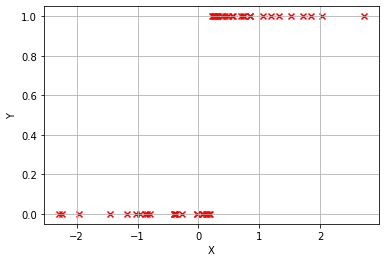

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_binary_data(m=50): 
    X = np.random.randn(m) #sample from a normal distribution
    X = np.array(sorted(X))
    Y = X > 0.2    #return the binary vector with true if X is above some threshold and false if below
    return X, Y #returns X (the input) and Y (labels)

def plot_data(X, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', marker='x')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()
    
X, Y = make_binary_data()
plot_data(X, Y)


## Logits



> These refer to vectors (or scalar in the case of a binary) of unnormalised probabilities in the range $(-\infty, \infty)$.

You may have noticed that the output is the same as __that obtained using regression analysis__.

Logits are similar to probabilities, with the following specific relations:
- __50% chance (probability=$0.5$) is equal to logit=$0$.__
- Below-zero values indicate a low probability, while above-zero values indicate a high probability.

Logits are used for classification for the following reasons:
- To prevent unnecessary operations that transform them into probabilities if we are after the label (we will see the transformation shortly).
- For binary classification, every output from the classifier that is greater than `1` is considered `True`, while any input below is `False`.

__Note:__ Mathematically, the term, logit, refers to the log of the odds of a probability, and it __transforms probability (p below) back into the $(-\infty, \infty)$ range__.

It has the following general formula:

$$
    L = \ln \frac{p}{1 - p}
$$

However, we will employ the term, logit, later to simply refer to the values outputted by the model.



## Converting Logits into Probabilities



Logits can be converted into probabilities by applying a **sigmoid** function to the output:

<p align=center><img src=images/sigmoid.jpg width=1000></p>

> The sigmoid function squashes the logits from the $(-\infty, \infty)$ to $(0, 1)$ range, which can be easily interpreted.

Additionally, we can write a function to compute the derivative of the sigmoid function.
This is required to differentiate the loss with respect to the model parameters, as they only affect the loss through the sigmoid.

__Note:__ The sigmoid is the inverse function of the logit.

<p align=center><img src=images/sigmoid_deriv.jpg width=1000></p>

## The Loss Function for Binary Classification: Binary Cross Entropy (BCE)

The basic formula for BCE is

$$
    BCE = - (y\ln\hat{y} + (1-y)\ln(1-\hat{y}))
$$

The formula can be broken down into parts exclusively:
- If the label is `1`, $(1-y)\ln(1-\hat{y})$ is `0`.
- If the label is `0`, $y\ln\hat{y}$ is `0`.

<p align=center><img src=images/bce.jpg width=1000></p>

### Calculating One Part Per Label

It is possible to calculate one part for the `1` label and the second for the `0` label with, for example, the `if label == 0` switch. However, occasionally, in ML and deep learning, it is preferable to use a technique called `label smoothing`.

## Label Smoothing

> Label smoothing changes the `{0, 1}` labels to 'soft targets', e.g. `{0.1, 0.9}`.

### Reasons for application

- In practice, it is impossible to reach the `1` value for sigmoid. Therefore, even if the predicted probability is `0.99999`, some loss will remain.
- This is also the case for `0` as it is quite difficult for the classifier to reach this exact value.

### Implementation

- There are many implementation approaches. Conventionally, we subtract a constant from the largest labels (`1`) and add it to the `0` labels (for the binary case).
- $\alpha$ is the __smoothing hyperparameter__, usually around `0.1`.

### Use cases and benefits

- The classifier is __less confident__ about its predictions: Due to the inherent noise in the data, label smoothing is often desirable, particularly for more complex and powerful models, e.g. neural networks.
- Predictions are smooth and gradual: Instead of having rough jumps from the `0.999` probability to the `0.0001` probability in another case, our algorithms attempt to distribute the probability more evenly.
- Classifier exhibits significantly __low accuracy__ for hard examples: Since the value has to reach `0.9` instead of `1`, `0.8` will also be acceptable.

## BCE implementation

We begin with a naive implementation; simply follow the formula:

In [2]:
def bce(prediction, label):
    return -(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))

In [6]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

prediction = sigmoid(np.array([-0.5, 0.5, 0])) 
labels = np.array([0, 1, 1])

print(bce(prediction, labels))

[0.47407698 0.47407698 0.69314718]


However, as is conventional, the __numerical instability emerges gradually__. As a rule of thumb, always inspect `exp` and its inverse function, `ln`:

In [7]:
prediction = np.array([1])
labels = np.array([0])

print(bce(prediction, labels))

[inf]


<ipython-input-2-f3031382e7cc>:2: RuntimeWarning: divide by zero encountered in log
  return -(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))


In [8]:
prediction = np.array([0])
labels = np.array([1])

print(bce(prediction, labels))

[inf]


<ipython-input-2-f3031382e7cc>:2: RuntimeWarning: divide by zero encountered in log
  return -(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))


In [9]:
prediction = np.array([0])
labels = np.array([0])

print(bce(prediction, labels))

[nan]


<ipython-input-2-f3031382e7cc>:2: RuntimeWarning: divide by zero encountered in log
  return -(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))
<ipython-input-2-f3031382e7cc>:2: RuntimeWarning: invalid value encountered in multiply
  return -(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))


In [10]:
prediction = np.array([1])
labels = np.array([1])

print(bce(prediction, labels))

[nan]


<ipython-input-2-f3031382e7cc>:2: RuntimeWarning: divide by zero encountered in log
  return -(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))
<ipython-input-2-f3031382e7cc>:2: RuntimeWarning: invalid value encountered in multiply
  return -(label * np.log(prediction) + (1 - label) * np.log(1 - prediction))


### Analysis

- If the model __is highly confident and wrong__ (first two cases), we are left with  `np.log(0)`, which goes towards $-\infty$ (when we take `-`, we observe $\infty$).
- If the model __is highly confident and right__ (last two cases), we are left with $ 0 * \ln{0} $ and, consequently, $ 0 * \infty $, which is an undefined `NaN` (not a number) type.

## Stable BCE

A possible method to stabilise the BCE loss is to combine the activation we saw earlier (`sigmoid`) and the `binary cross entropy`.

### Formulation

A numerically stable version can be derived. Note that we have skipped a few steps to save time. You can view the formula that we will use [here](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits):

$$
\begin{align}
    BCE & = - (y\ln\hat{y} + (1-y)\ln(1-\hat{y})) \\
        & = - (y\ln(\frac{1}{1+e^{-x}}) + (1-y)\ln(1-\frac{1}{1+e^{-x}}) \\
        & ... \\
        & = x - xy + \ln(1 + e^{-x})
\end{align}
$$

Unfortunately, this leaves us with $e^{-x}$ once more. After taking the required mathematical steps, we arrive at this formula:

$$
    \max(0, x) - xy + \ln(1 + e^{-|x|}),
$$

where `x` refers to logit and `y` to labels.

Evidently, regardless of the `x` value, a negative value will be obtained. Thus, `e` can only underflow, which is fine for our case (and $\ln(1 + 0) = 0$). We urge you to explore the other formulas [here](https://discuss.pytorch.org/t/numerical-stability-of-bcewithlogitsloss/8246).

### Derivative

Furthermore, we have to calculate the derivative of `BCEWithLogits` to backpropagate through our model.

Recall that you can always use [Wolfram Alpha](https://www.wolframalpha.com/) for such laborious tasks or, at least, to have an idea or a direction.

Given that, the derivative is presented as

$$
\begin{align}
    \frac{\partial BCE}{\partial x} &= \sigma(x) - y \\
    \frac{\partial BCE}{\partial y} &= -x
\end{align}
$$

__This BCE will work directly on the `logits`.__

## Building the Binary Classifier Model Class

For this task, we will use the chain rule to compute the gradient with the previously defined loss function.


<p align=center><img src=images/binary_classification.jpg width=1000></p>

## Classification in sklearn

Sklearn has several different classification algorithms. Here, we will use the `LogisticRegression` class from `sklearn.linear_model`, which is one of the most popular and simple ones. We will explore more algorithms eventually; however, note that they all share a similar implementation procedure.

To test it, we will use the breast-cancer dataset from `sklearn.datasets`:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Having loaded and split our data, the next step involves building and training our model. As with linear regression, we train the instance of the model on the training set and thereafter predict the labels of the test set.

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9532163742690059


/home/ivanyingx/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Notice that the utilised solver did not converge. This is attributed to the simplicity of the dataset. Therefore, as stated in the sklearn documentation, we can choose a different solver.

- For small datasets, `liblinear` is a good choice, whereas `sag` and `saga` are relatively fast for large ones.
- For multiclass problems, only `newton-cg`, `sag`, `saga` and `lbfgs` can handle the multinomial loss.
- The `liblinear` solver is limited to one-versus-rest schemes.

Here, we use the `liblinear` solver.

In [19]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9649122807017544


Success! Not only did the algorithm converge, but also the accuracy improved.

## Conclusion

At this point, you should have a good understanding of

- the labels for classification problems.
- `logits` and `sigmoid`.
- naive implementation of `sigmoid` and its more stable versions.
- BCE.